In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Student_performance_data _.csv")  
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [74]:
var = df.columns.tolist()
for col in df[var]:
    print(f"Column: {col}")
    print(df[col].unique())

Column: StudentID
[1001 1002 1003 ... 3390 3391 3392]
Column: Age
[17 18 15 16]
Column: Gender
[1 0]
Column: Ethnicity
[0 2 1 3]
Column: ParentalEducation
[2 1 3 4 0]
Column: StudyTimeWeekly
[19.83372281 15.40875606  4.21056977 ...  6.80549964 12.41665266
 17.81990749]
Column: Absences
[ 7  0 26 14 17 10 22  1 11 15 21  9 16 29  2 25 20  5  8 12 27 23  3 13
  6 28  4 18 19 24]
Column: Tutoring
[1 0]
Column: ParentalSupport
[2 1 3 4 0]
Column: Extracurricular
[0 1]
Column: Sports
[0 1]
Column: Music
[1 0]
Column: Volunteering
[0 1]
Column: GPA
[2.92919559 3.04291483 0.11260225 ... 1.14233288 1.80329676 2.14001388]
Column: GradeClass
[2. 1. 4. 3. 0.]


In [79]:
import pandas as pd


df = pd.read_csv("Student_performance_data _.csv")


for col in df.columns:
    if df[col].nunique() < 5:  
        df[col] = df[col].astype('object')
    else:
        df[col] = pd.to_numeric(df[col], errors='coerce')  


print(df.dtypes)


StudentID              int64
Age                   object
Gender                object
Ethnicity             object
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring              object
ParentalSupport        int64
Extracurricular       object
Sports                object
Music                 object
Volunteering          object
GPA                  float64
GradeClass           float64
dtype: object


In [84]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv("Student_performance_data _.csv")

# Identify categorical and numerical features
for col in df.columns:
    if df[col].nunique() < 5:  
        df[col] = df[col].astype('object')
    else:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Separate categorical and numerical features
categorical_features = df.select_dtypes(include=['object'])

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' removes redundancy

# Fit and transform categorical data
encoded_array = encoder.fit_transform(categorical_features)

# Convert encoded data to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out())

# Concatenate numerical and encoded categorical data
final_df = pd.concat([numerical_features, encoded_df], axis=1)

print("One-Hot Encoded Categorical Features:")
print(final_df.head())


One-Hot Encoded Categorical Features:
   StudentID  ParentalEducation  StudyTimeWeekly  Absences  ParentalSupport  \
0       1001                  2        19.833723         7                2   
1       1002                  1        15.408756         0                1   
2       1003                  3         4.210570        26                2   
3       1004                  3        10.028829        14                3   
4       1005                  2         4.672495        17                3   

        GPA  GradeClass  Age_16  Age_17  Age_18  Gender_1  Ethnicity_1  \
0  2.929196         2.0     0.0     1.0     0.0       1.0          0.0   
1  3.042915         1.0     0.0     0.0     1.0       0.0          0.0   
2  0.112602         4.0     0.0     0.0     0.0       0.0          0.0   
3  2.054218         3.0     0.0     1.0     0.0       1.0          0.0   
4  1.288061         4.0     0.0     1.0     0.0       1.0          0.0   

   Ethnicity_2  Ethnicity_3  Tutoring_1  E

In [ ]:
separate categorical from numerical,  one enhot code catorgorical data then concat the numerical and categorical

In [31]:
import pandas as pd

df = pd.read_csv("Student_performance_data _.csv")

In [33]:
df.isnull().sum()


StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [47]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
df = pd.read_csv("Student_performance_data _.csv")  # Replace with your file path

# Define numeric columns to scale
numeric_columns = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']  # Replace with actual numeric columns in your dataset

# Ensure the numeric columns exist in the dataset
missing_columns = [col for col in numeric_columns if col not in df.columns]
if missing_columns:
    print(f"Warning: The following columns are missing in the dataset: {missing_columns}")
else:
    # Apply scaling
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df[numeric_columns])  # Scaled data as NumPy array
    
    # Convert scaled data back to DataFrame for ease of use
    df_scaled = pd.DataFrame(df_scaled, columns=numeric_columns)
    
    # Print the scaled DataFrame
    print("Scaled Data:")
    print(df_scaled.head())



Scaled Data:
        Age  StudyTimeWeekly  Absences       GPA
0  0.472919         1.780336 -0.890822  1.118086
1  1.362944         0.997376 -1.717694  1.242374
2 -1.307132        -0.984045  1.353542 -1.960277
3  0.472919         0.045445 -0.063951  0.161790
4  0.472919        -0.902311  0.290422 -0.675573


In [40]:
import pandas as pd

df = pd.read_csv("Student_performance_data _.csv")

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("Student_performance_data _.csv")

# Step 1: Inspect the data
print(df.head())  # View first few rows
print(df.info())  # Check data types and missing values

# Step 2: Handle missing values
numeric_cols = df.select_dtypes(include=['number']).columns
df.fillna(df[numeric_cols].mean(), inplace=True)  # Fill numerical missing values with mean

if 'important_column' in df.columns:
    df.dropna(subset=['important_column'], inplace=True)  # Drop rows with missing crucial values

# Step 3: Handle outliers using IQR method
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Step 4: Standardize and Normalize Features
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

minmax_scaler = MinMaxScaler()
df[numeric_cols] = minmax_scaler.fit_transform(df[numeric_cols])

# Step 5: Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Step 6: Feature Engineering (Creating performance categories)
if 'score' in df.columns:
    df['performance_category'] = pd.cut(df['score'], bins=[0, 50, 75, 100], labels=['Low', 'Medium', 'High'])

# Step 7: Split data for modeling
target_col = 'target_column'  # Modify this based on your dataset
if target_col in df.columns:
    X = df.drop(columns=[target_col])  
    y = df[target_col]  # Define target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Data successfully split for modeling!")

print("Preprocessing completed successfully!")

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

In [6]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = df[df['GradeClass'] == 4.0]
minority_class = df[df['GradeClass'] == 0.0]

# Oversample the minority class
minority_oversampled = resample(minority_class,
                                replace=True,  # Sample with replacement
                                n_samples=len(majority_class),  # Match majority class size
                                random_state=42)

# Combine the majority and oversampled minority classes
df_balanced = pd.concat([majority_class, minority_oversampled])

# Check the new class distribution
print("Class Distribution After Oversampling:")
print(df_balanced['GradeClass'].value_counts())


Class Distribution After Oversampling:
GradeClass
4.0    1211
0.0    1211
Name: count, dtype: int64


StudentID              int64
Age                   object
Gender                object
Ethnicity             object
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring              object
ParentalSupport        int64
Extracurricular       object
Sports                object
Music                 object
Volunteering          object
GPA                  float64
GradeClass           float64
dtype: object


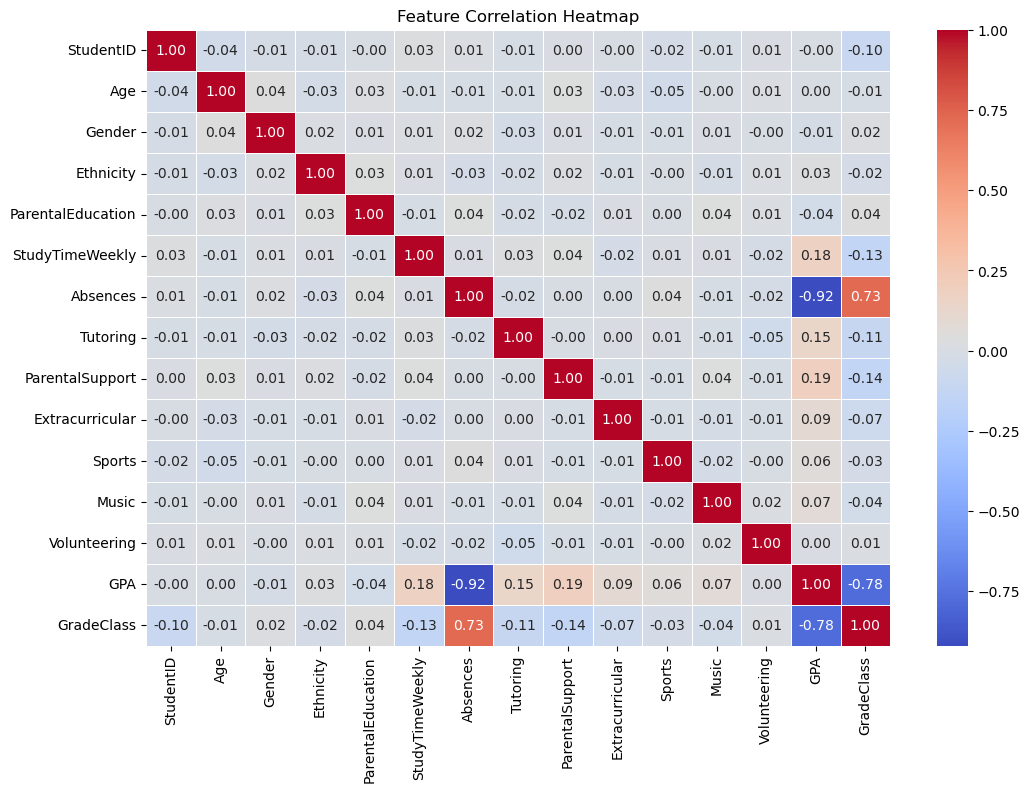

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Student_performance_data _.csv")

# Identify categorical and numerical features
for col in df.columns:
    if df[col].nunique() < 5:  
        df[col] = df[col].astype('object')
    else:
        df[col] = pd.to_numeric(df[col], errors='coerce')  

# Display feature types
print(df.dtypes)

# Compute correlation matrix
correlation_matrix = df.corr()

# Visualize correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [13]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Student_performance_data _.csv")

# Drop constant columns (where all values are the same)
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
df.drop(columns=constant_columns, inplace=True)

# Drop duplicate columns (where all values are identical across another column)
duplicate_columns = df.T.duplicated(keep='first')  # Transpose for column-wise check
df = df.loc[:, ~duplicate_columns]

# Drop columns with only missing values
no_answer_columns = df.columns[df.isna().all()]
df.drop(columns=no_answer_columns, inplace=True)

print("Cleaned DataFrame after dropping constant, duplicate, and empty columns:")
print(df.head())


Cleaned DataFrame after dropping constant, duplicate, and empty columns:
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA

In [15]:
import pandas as pd

def categorize_gpa(gpa_column, threshold=2.0):

    return (gpa_column >= threshold).astype(int)

# Load dataset
df = pd.read_csv("Student_performance_data _.csv")

# Assuming the target variable is named 'GPA'
df['GPA_binary'] = categorize_gpa(df['GPA'])

print(df[['GPA', 'GPA_binary']].head())


        GPA  GPA_binary
0  2.929196           1
1  3.042915           1
2  0.112602           0
3  2.054218           1
4  1.288061           0


In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns correctly
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Apply Min-Max Scaling
scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(numerical_features)

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_array, columns=numerical_features.columns)

print("Scaled Numerical Features:")
print(scaled_df.head())



Scaled Numerical Features:
   StudentID       Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0   0.000000  0.666667     1.0   0.000000               0.50         0.992773   
1   0.000418  1.000000     0.0   0.000000               0.25         0.771270   
2   0.000836  0.000000     0.0   0.666667               0.75         0.210718   
3   0.001255  0.666667     1.0   0.000000               0.75         0.501965   
4   0.001673  0.666667     1.0   0.000000               0.50         0.233840   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0  0.241379       1.0             0.50              0.0     0.0    1.0   
1  0.000000       0.0             0.25              0.0     0.0    0.0   
2  0.896552       0.0             0.50              0.0     0.0    0.0   
3  0.482759       0.0             0.75              1.0     0.0    0.0   
4  0.586207       1.0             0.75              0.0     0.0    0.0   

   Volunteering       GPA  GradeClass  GP

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [22]:
df = pd.read_csv("Student_performance_data _.csv")  # Ensure correct file path


In [23]:
# Remove target column from features
X = df.drop(columns=["GradeClass"])  # Replace "GradeClass" with the actual target column name
y = df["GradeClass"]  # Define target variable


In [24]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=["object"]).columns

# Apply One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape[0]} samples")
print(f"Test Set: {X_test.shape[0]} samples")


Training Set: 1913 samples
Test Set: 479 samples


In [26]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model with more iterations
model = LogisticRegression(solver="lbfgs", max_iter=5000)  # Increase iteration limit
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)


In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Compute metrics
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Baseline Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Baseline Model Performance:
Accuracy: 0.70
Precision: 0.46
Recall: 0.46
F1-Score: 0.46


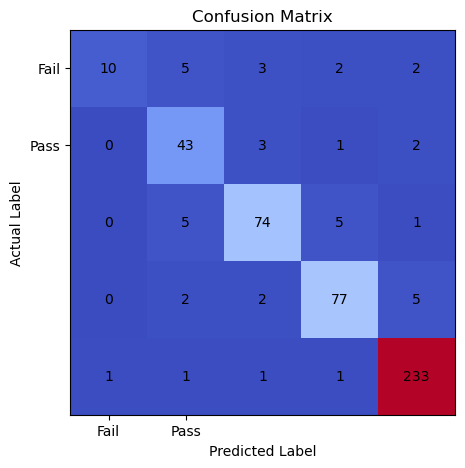

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Load dataset
df = pd.read_csv("Student_performance_data _.csv")  # Ensure correct file path

# Define features (X) and target variable (y)
X = df.drop(columns=["GradeClass"])  # Features
y = df["GradeClass"]  # Target variable for classification

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train classifier (example: Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Get predictions
y_pred = model.predict(X_test_scaled)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create figure
fig, ax = plt.subplots(figsize=(6, 5))
ax.imshow(conf_matrix, cmap="coolwarm")

# Define class labels
classes = ["Fail", "Pass"]  # Adjust based on your dataset
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)

# Annotate matrix with values
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color="black")

# Labels & title
ax.set_xlabel("Predicted Label")
ax.set_ylabel("Actual Label")
ax.set_title("Confusion Matrix")
plt.grid(False)

# Show plot
plt.show()


In [41]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)


In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [43]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


In [ ]:
Linear Regression (for GPA Prediction)

In [44]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


In [45]:
from sklearn.metrics import accuracy_score


accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")


Decision Tree Accuracy: 0.93
Random Forest Accuracy: 0.91
XGBoost Accuracy: 0.92


In [47]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)  # Works for continuous labels like GPA

y_pred = model.predict(X_test_scaled)


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features for better optimization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)  # Works for continuous labels like GPA

# Predict GPA values on test set
y_pred = model.predict(X_test_scaled)

# Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Model Performance:
Mean Squared Error (MSE): 0.04
R-squared (R²): 0.96


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd

# Load dataset
df = pd.read_csv("Student_performance_data _.csv")

# Define target
df['Pass_Fail'] = df['GradeClass'].apply(lambda x: 1 if x in [0, 1, 2, 3] else 0)

# Separate features
X = df.drop(columns=["GradeClass", "Pass_Fail", "StudentID"])  # Drop target and irrelevant ID
y = df["Pass_Fail"]

# Identify categorical and numerical
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Models
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate all models
results = []
for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:, 1]
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_prob)
    })

# Show results
results_df = pd.DataFrame(results)
print(results_df)


           Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Decision Tree  0.949896   0.969828  0.929752  0.949367  0.939411
1  Random Forest  0.962422   0.986957  0.938017  0.961864  0.965948
2        XGBoost  0.954071   0.970085  0.938017  0.953782  0.958765


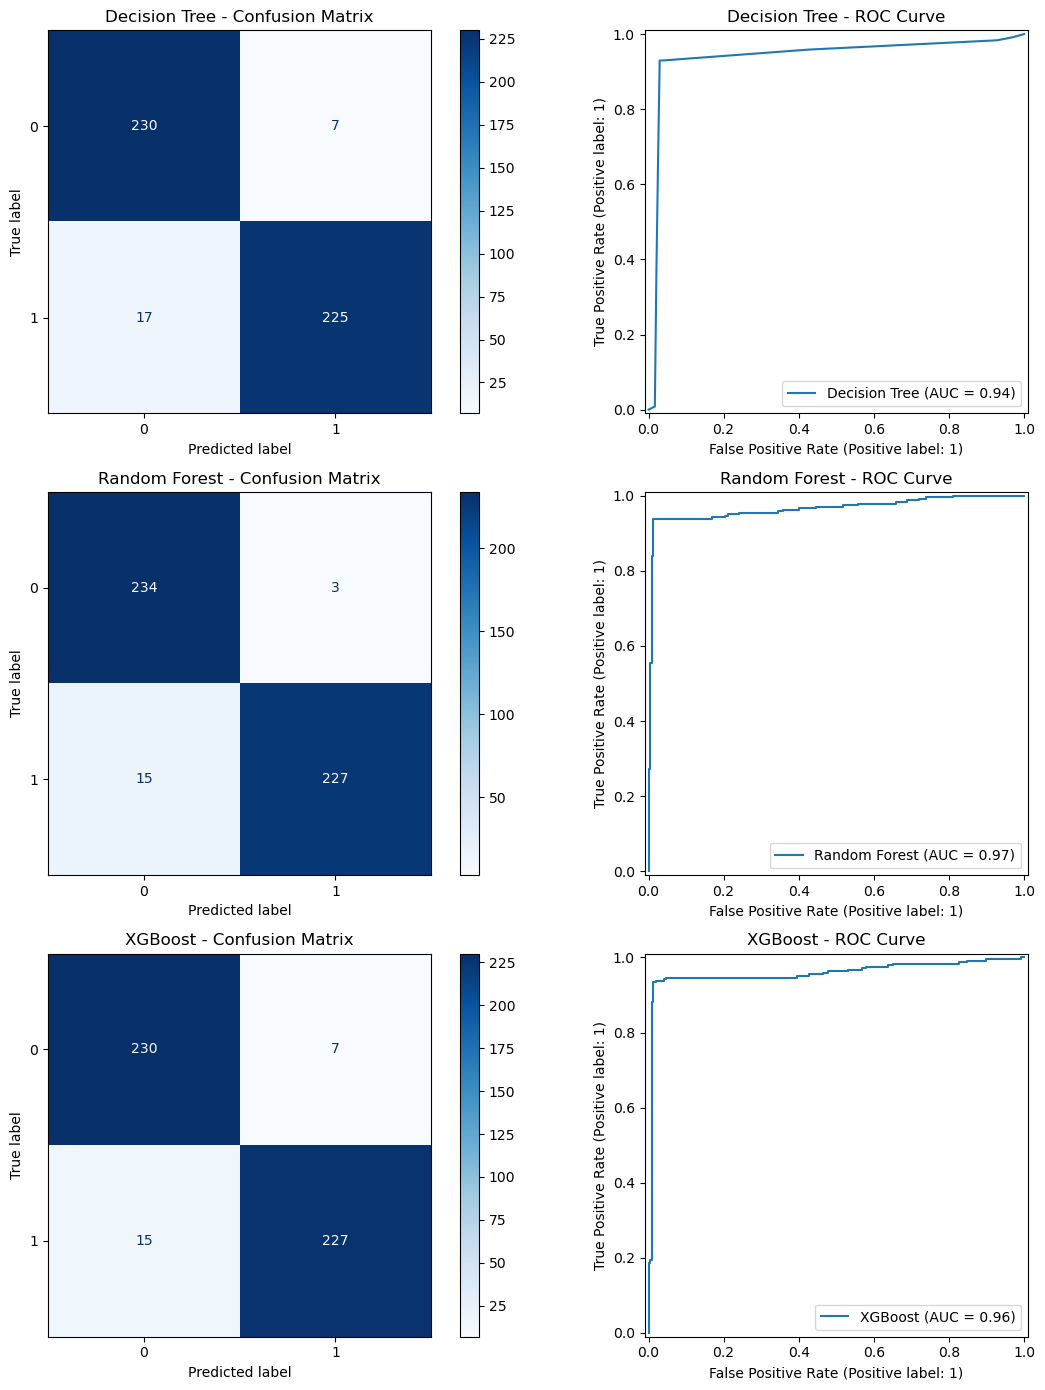

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, confusion_matrix

# Set up plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 14))
axes = axes.flatten()

# Iterate through models to plot confusion matrix and ROC curve
for idx, (name, model) in enumerate(models.items()):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp_cm.plot(ax=axes[idx*2], cmap='Blues')
    axes[idx*2].set_title(f'{name} - Confusion Matrix')

    # Plot ROC curve
    RocCurveDisplay.from_predictions(y_test, y_prob, ax=axes[idx*2 + 1], name=name)
    axes[idx*2 + 1].set_title(f'{name} - ROC Curve')

plt.tight_layout()
plt.show()
